# Ensemble(Voting and Bagging)

A machine learning ensemble is a method of finding the optimal answer using multiple machine learning models.

- Learning data using multiple models and averaging the prediction results of all models

**Types of ensemble techniques**
- Voting: draw results through voting
- Bagging: Deriving results by creating duplicate samples
- Boosting: weighting while compensating for previous errors
- Stacking: The meta model is predicted once again through the predicted results based on multiple models.

**References**

* [Voting](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-1)
* [Bagging](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-2)
* [Boosting](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-3)

In [2]:
import pandas as pd
import numpy as np
from IPython.display import Image

np.set_printoptions(suppress=True)

In [3]:
from sklearn.datasets import load_boston

In [4]:
data = load_boston()

In [5]:
df = pd.DataFrame(data['data'], columns = data['feature_names'])

In [6]:
df['MEDV'] = data['target']

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV'])

In [10]:
x_train.shape, x_test.shape

((379, 13), (127, 13))

In [11]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
479,14.33370,0.0,18.10,0.0,0.614,6.229,88.0,1.9512,24.0,666.0,20.2,383.32,13.11
370,6.53876,0.0,18.10,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96
43,0.15936,0.0,6.91,0.0,0.448,6.211,6.5,5.7209,3.0,233.0,17.9,394.46,7.44
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
197,0.04666,80.0,1.52,0.0,0.404,7.107,36.6,7.3090,2.0,329.0,12.6,354.31,8.61


In [12]:
y_train.head()

479    21.4
370    50.0
43     24.7
173    23.6
197    30.3
Name: MEDV, dtype: float64

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

## single regression prediction model

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

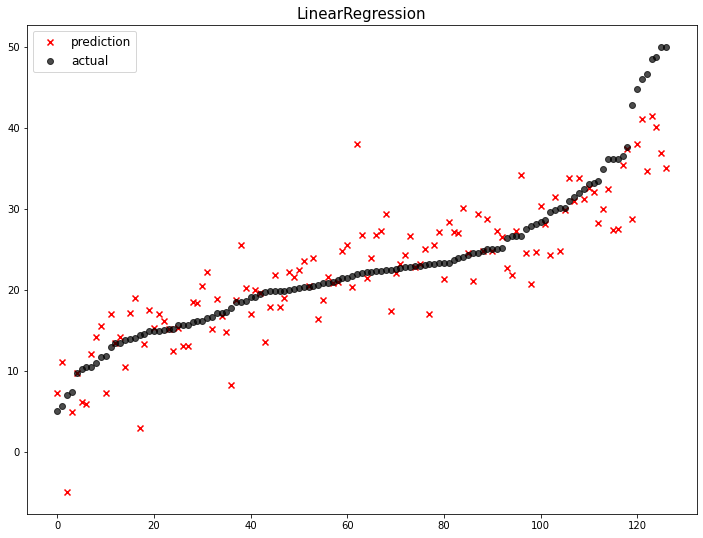

              model        mse
0  LinearRegression  22.641613


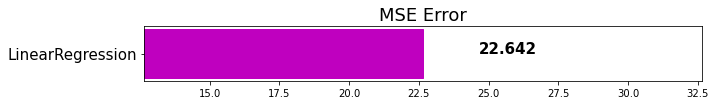

In [16]:
linear_reg = LinearRegression(n_jobs = -1)
linear_reg.fit(x_train, y_train)
pred = linear_reg.predict(x_test)
mse_eval('LinearRegression', pred, y_test)

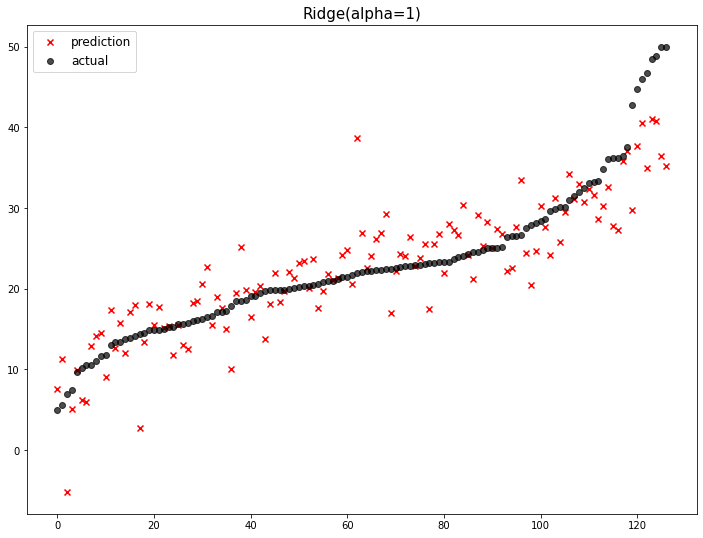

              model        mse
0  LinearRegression  22.641613
1    Ridge(alpha=1)  21.869433


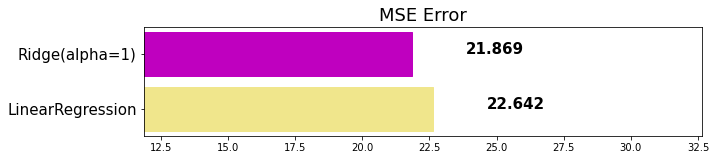

In [17]:
ridge = Ridge(alpha = 1)
ridge.fit(x_train, y_train)
pred = ridge.predict(x_test)
mse_eval('Ridge(alpha=1)', pred, y_test)

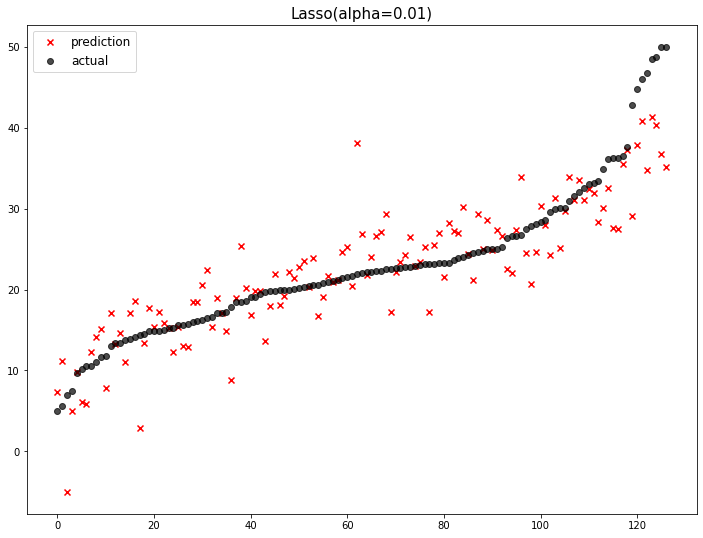

               model        mse
0   LinearRegression  22.641613
1  Lasso(alpha=0.01)  22.279112
2     Ridge(alpha=1)  21.869433


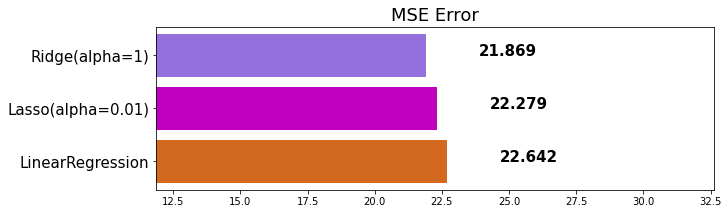

In [18]:
lasso = Lasso(alpha = 0.01)
lasso.fit(x_train, y_train)
pred = lasso.predict(x_test)
mse_eval('Lasso(alpha=0.01)', pred, y_test)

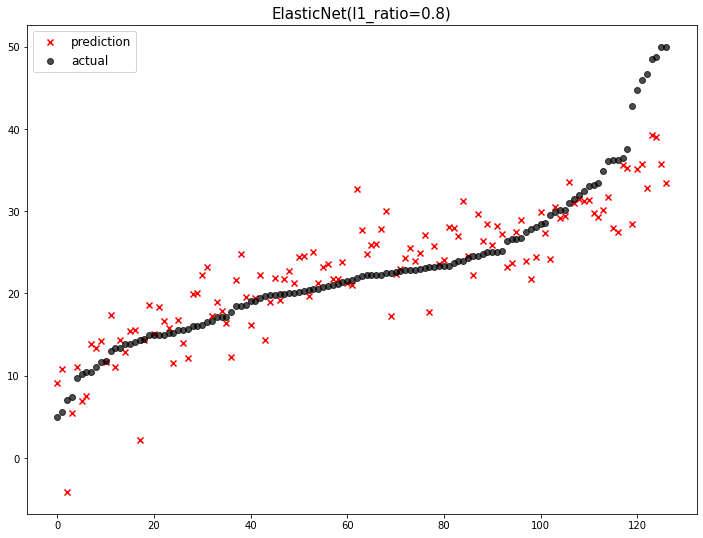

                      model        mse
0  ElasticNet(l1_ratio=0.8)  23.074116
1          LinearRegression  22.641613
2         Lasso(alpha=0.01)  22.279112
3            Ridge(alpha=1)  21.869433


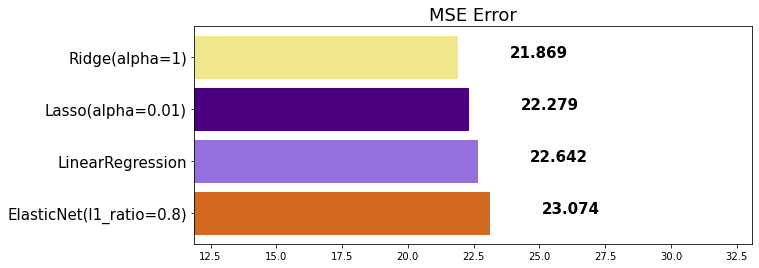

In [19]:
elasticnet = ElasticNet(alpha = 0.5, l1_ratio = 0.8)
elasticnet.fit(x_train, y_train)
pred = elasticnet.predict(x_test)
mse_eval('ElasticNet(l1_ratio=0.8)', pred, y_test)    

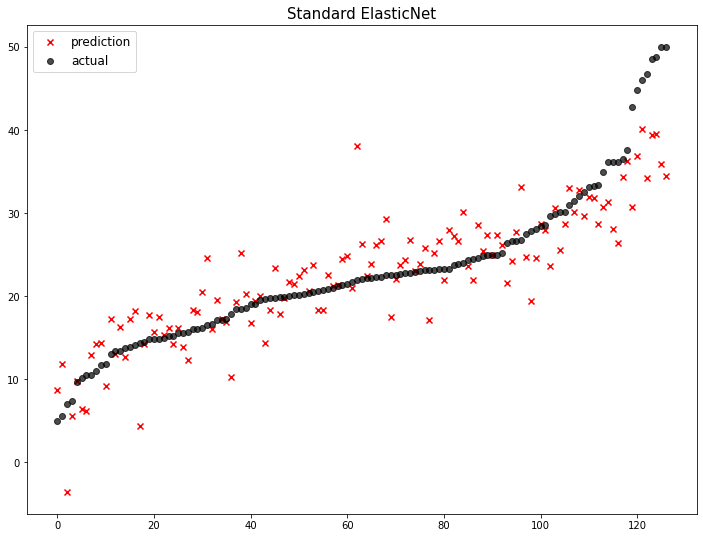

                      model        mse
0  ElasticNet(l1_ratio=0.8)  23.074116
1          LinearRegression  22.641613
2         Lasso(alpha=0.01)  22.279112
3       Standard ElasticNet  22.058335
4            Ridge(alpha=1)  21.869433


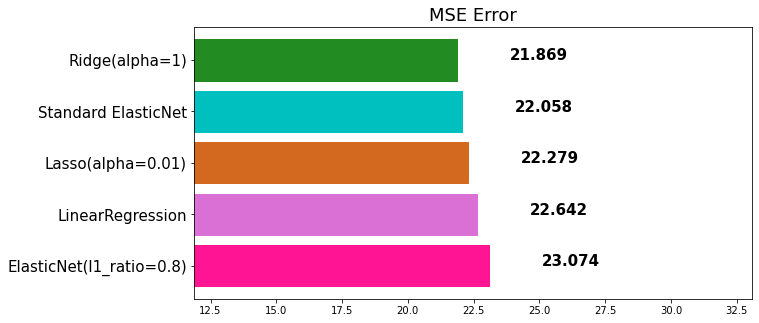

In [20]:
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha = 0.1, l1_ratio = 0.2)
)
elasticnet_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

C:\Users\boyka\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70.54427247266358, tolerance: 3.188612944591029
  model = cd_fast.enet_coordinate_descent(


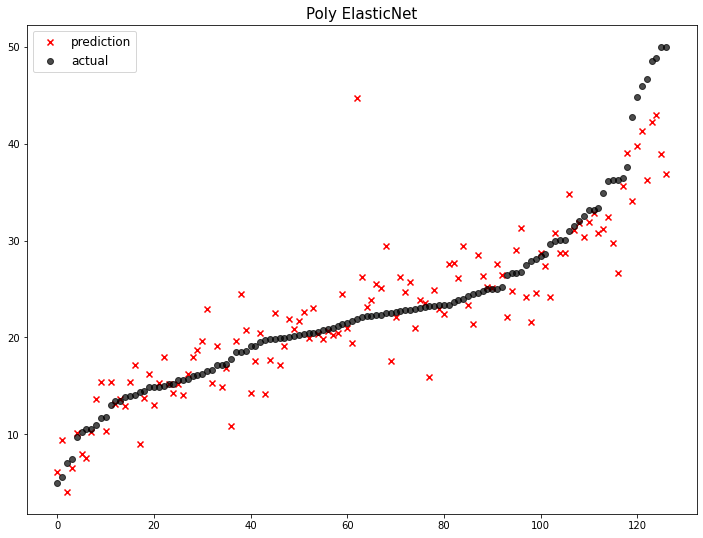

                      model        mse
0  ElasticNet(l1_ratio=0.8)  23.074116
1          LinearRegression  22.641613
2         Lasso(alpha=0.01)  22.279112
3       Standard ElasticNet  22.058335
4            Ridge(alpha=1)  21.869433
5           Poly ElasticNet  17.086267


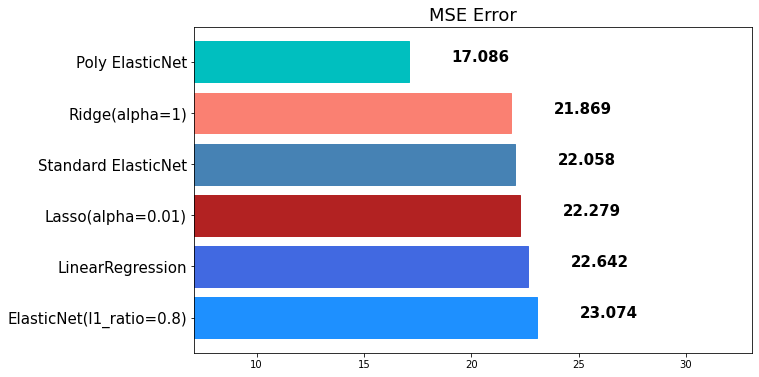

In [21]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree = 2, include_bias = False),
    StandardScaler(),
    ElasticNet(alpha = 0.1, l1_ratio = 0.2)
)
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('Poly ElasticNet', poly_pred, y_test)

## Ensemble

[scikit-learn document](https://scikit-learn.org/stable/modules/classes.html?highlight=ensemble#module-sklearn.ensemble)

### Voting - Regression

Voting literally means **method of deciding through voting** Voting is similar to bagging in that it is a voting method, but there are major differences as follows

- Voting uses a combination of different algorithm models
- Bagging uses different sample combinations within the same algorithm

In [22]:
from sklearn.ensemble import VotingRegressor, VotingClassifier

You must define the model in the form of **Tuple**.

In [23]:
single_models = [
    ('linear_reg', linear_reg),
    ('ridge', ridge),
    ('lasso', lasso),
    ('elasticnet_pipeline', elasticnet_pipeline),
    ('poly_pipeline', poly_pipeline)
]

In [24]:
voting_regressor = VotingRegressor(single_models, n_jobs=-1)

In [25]:
voting_regressor.fit(x_train, y_train)

VotingRegressor(estimators=[('linear_reg', LinearRegression(n_jobs=-1)),
                            ('ridge', Ridge(alpha=1)),
                            ('lasso', Lasso(alpha=0.01)),
                            ('elasticnet_pipeline',
                             Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                              ElasticNet(alpha=0.1,
                                                         l1_ratio=0.2))])),
                            ('poly_pipeline',
                             Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures(include_bias=False)),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                       

In [26]:
voting_pred = voting_regressor.predict(x_test)

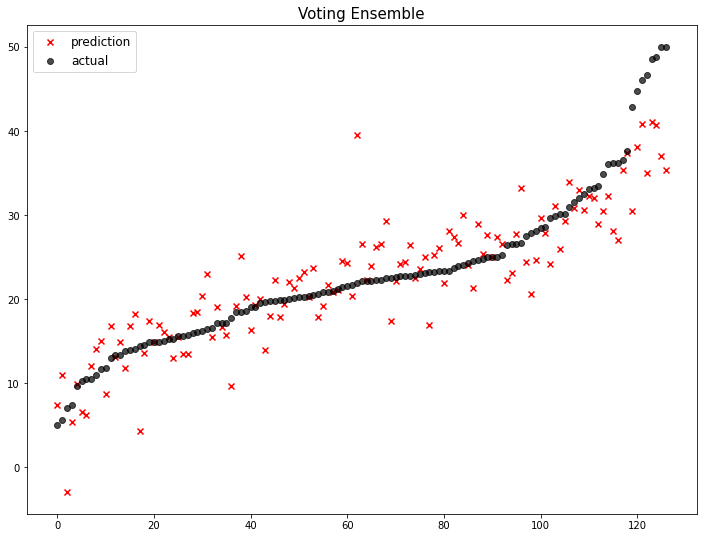

                      model        mse
0  ElasticNet(l1_ratio=0.8)  23.074116
1          LinearRegression  22.641613
2         Lasso(alpha=0.01)  22.279112
3       Standard ElasticNet  22.058335
4            Ridge(alpha=1)  21.869433
5           Voting Ensemble  20.521588
6           Poly ElasticNet  17.086267


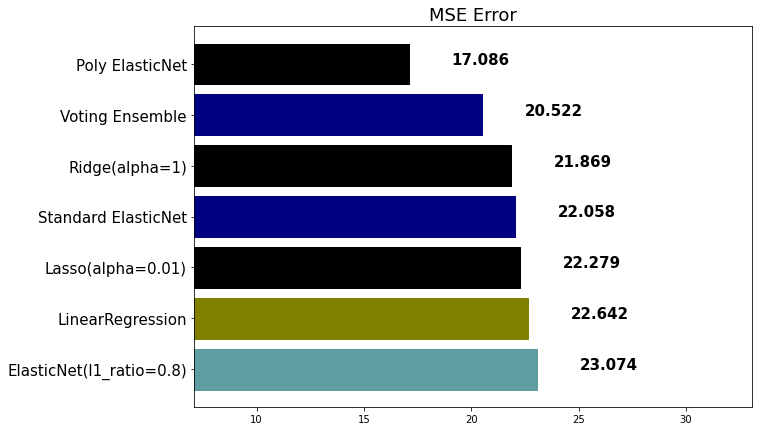

In [27]:
mse_eval('Voting Ensemble', voting_pred, y_test)

### Voting - Classification

[Referece](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-1)

When building a classifier model, the Voting Ensemble has one **important parameter**

`voting` = {'hard', 'soft'}

When set to **hard**

Let's take binary classification as an example of classifying class as 0, 1 and predicting.

In the hard voting method, multiple classes for the result value are borrowed.

Taking classification as an example, assuming that the predicted values for classification were 1, 0, 0, 1, 1, 1 received 3 votes and 0 received 2 votes, so in the Hard Voting method, 1 is predicted as the final value.

**soft**

The soft vote method calculates the average value of each probability and then determines the value with the highest probability.

For example, if the probability of class 0 was (0.4, 0.9, 0.9, 0.4, 0.4) and the probability of class 1 was (0.6, 0.1, 0.1, 0.6, 0.6),

- The final probability of class 0 is (0.4+0.9+0.9+0.4+0.4) / 5 = 0.44,
- The final probability of class 1 is (0.6+0.1+0.1+0.6+0.6) / 5 = 0.4

Because the result is different from the previous Hard Vote result, the final result will be selected.

In [28]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [30]:
models = [
    ('Logi', LogisticRegression()),
    ('Ridge', RidgeClassifier())
]

In [31]:
vc = VotingClassifier(models, voting='hard')

### Bagging

Bagging is **short for Bootstrap Aggregating**.

- Bootstrap = Sample + Aggregating = Aggregating

Bootstrap splits multiple datasets by sampling and allowing overlapping

If the configuration of the data set is [1, 2, 3, 4, 5],

1. group 1 = [1, 2, 3]
2. group 2 = [1, 3, 4]
3. group 3 = [2, 3, 5]

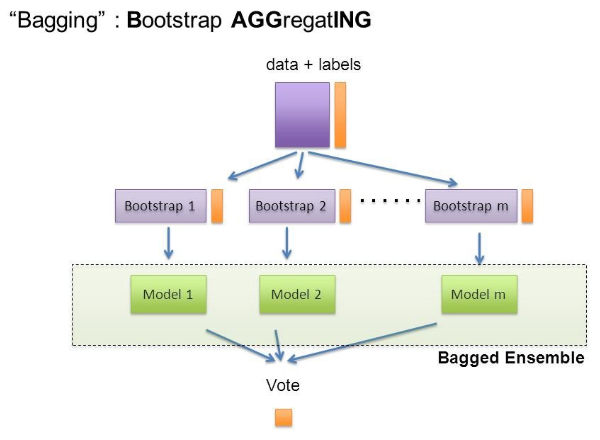

In [32]:
Image('https://teddylee777.github.io/images/2019-12-17/image-20191217015537872.png')

**Voting VS Bagging**

* **Voting** is an ensemble for a combination of multiple algorithms
* **Bagging** ensembles multiple sample combinations for one single algorithm.

**Representative Bagging Ensemble**
1. RandomForest
2. Bagging

### RandomForest

- DecisionTree (tree)-based Bagging Ensemble
- Very popular ensemble model
- Easy to use and excellent in performance

In [33]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [34]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

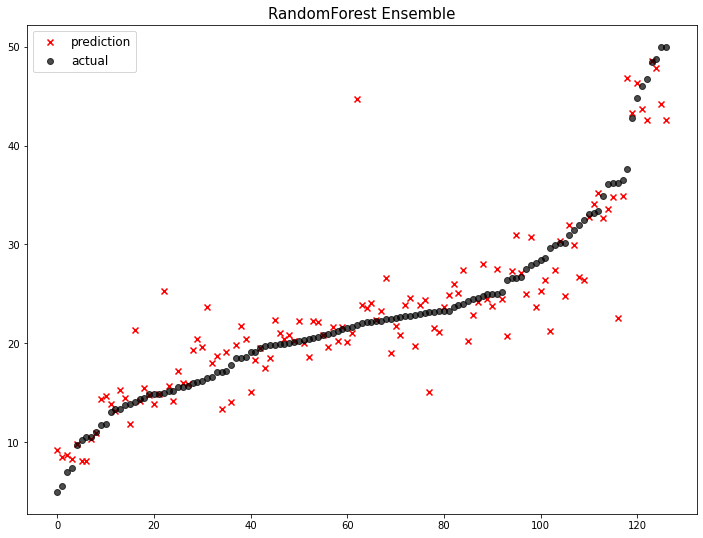

                      model        mse
0  ElasticNet(l1_ratio=0.8)  23.074116
1          LinearRegression  22.641613
2         Lasso(alpha=0.01)  22.279112
3       Standard ElasticNet  22.058335
4            Ridge(alpha=1)  21.869433
5           Voting Ensemble  20.521588
6           Poly ElasticNet  17.086267
7     RandomForest Ensemble  14.309778


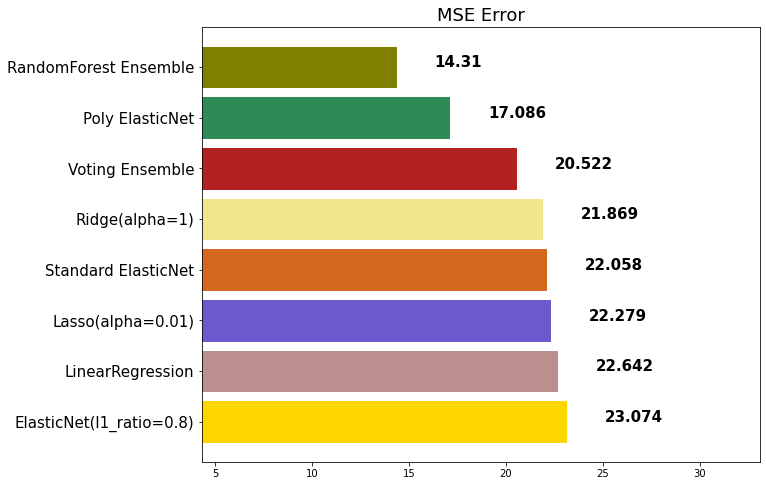

In [35]:
rfr_pred = rfr.predict(x_test)
mse_eval('RandomForest Ensemble', rfr_pred, y_test)

**Hyperparameter**

- random_state: random seed fixed value. Stay tuned and tune in!
- n_jobs: number of CPU usage
- max_depth: the maximum depth that can be deepened. To prevent overfitting
- n_estimators: the number of trees to ensemble
- max_features: The maximum number of features to use. To prevent overfitting
- min_samples_split: the minimum number of samples when the tree splits. default=2. To prevent overfitting

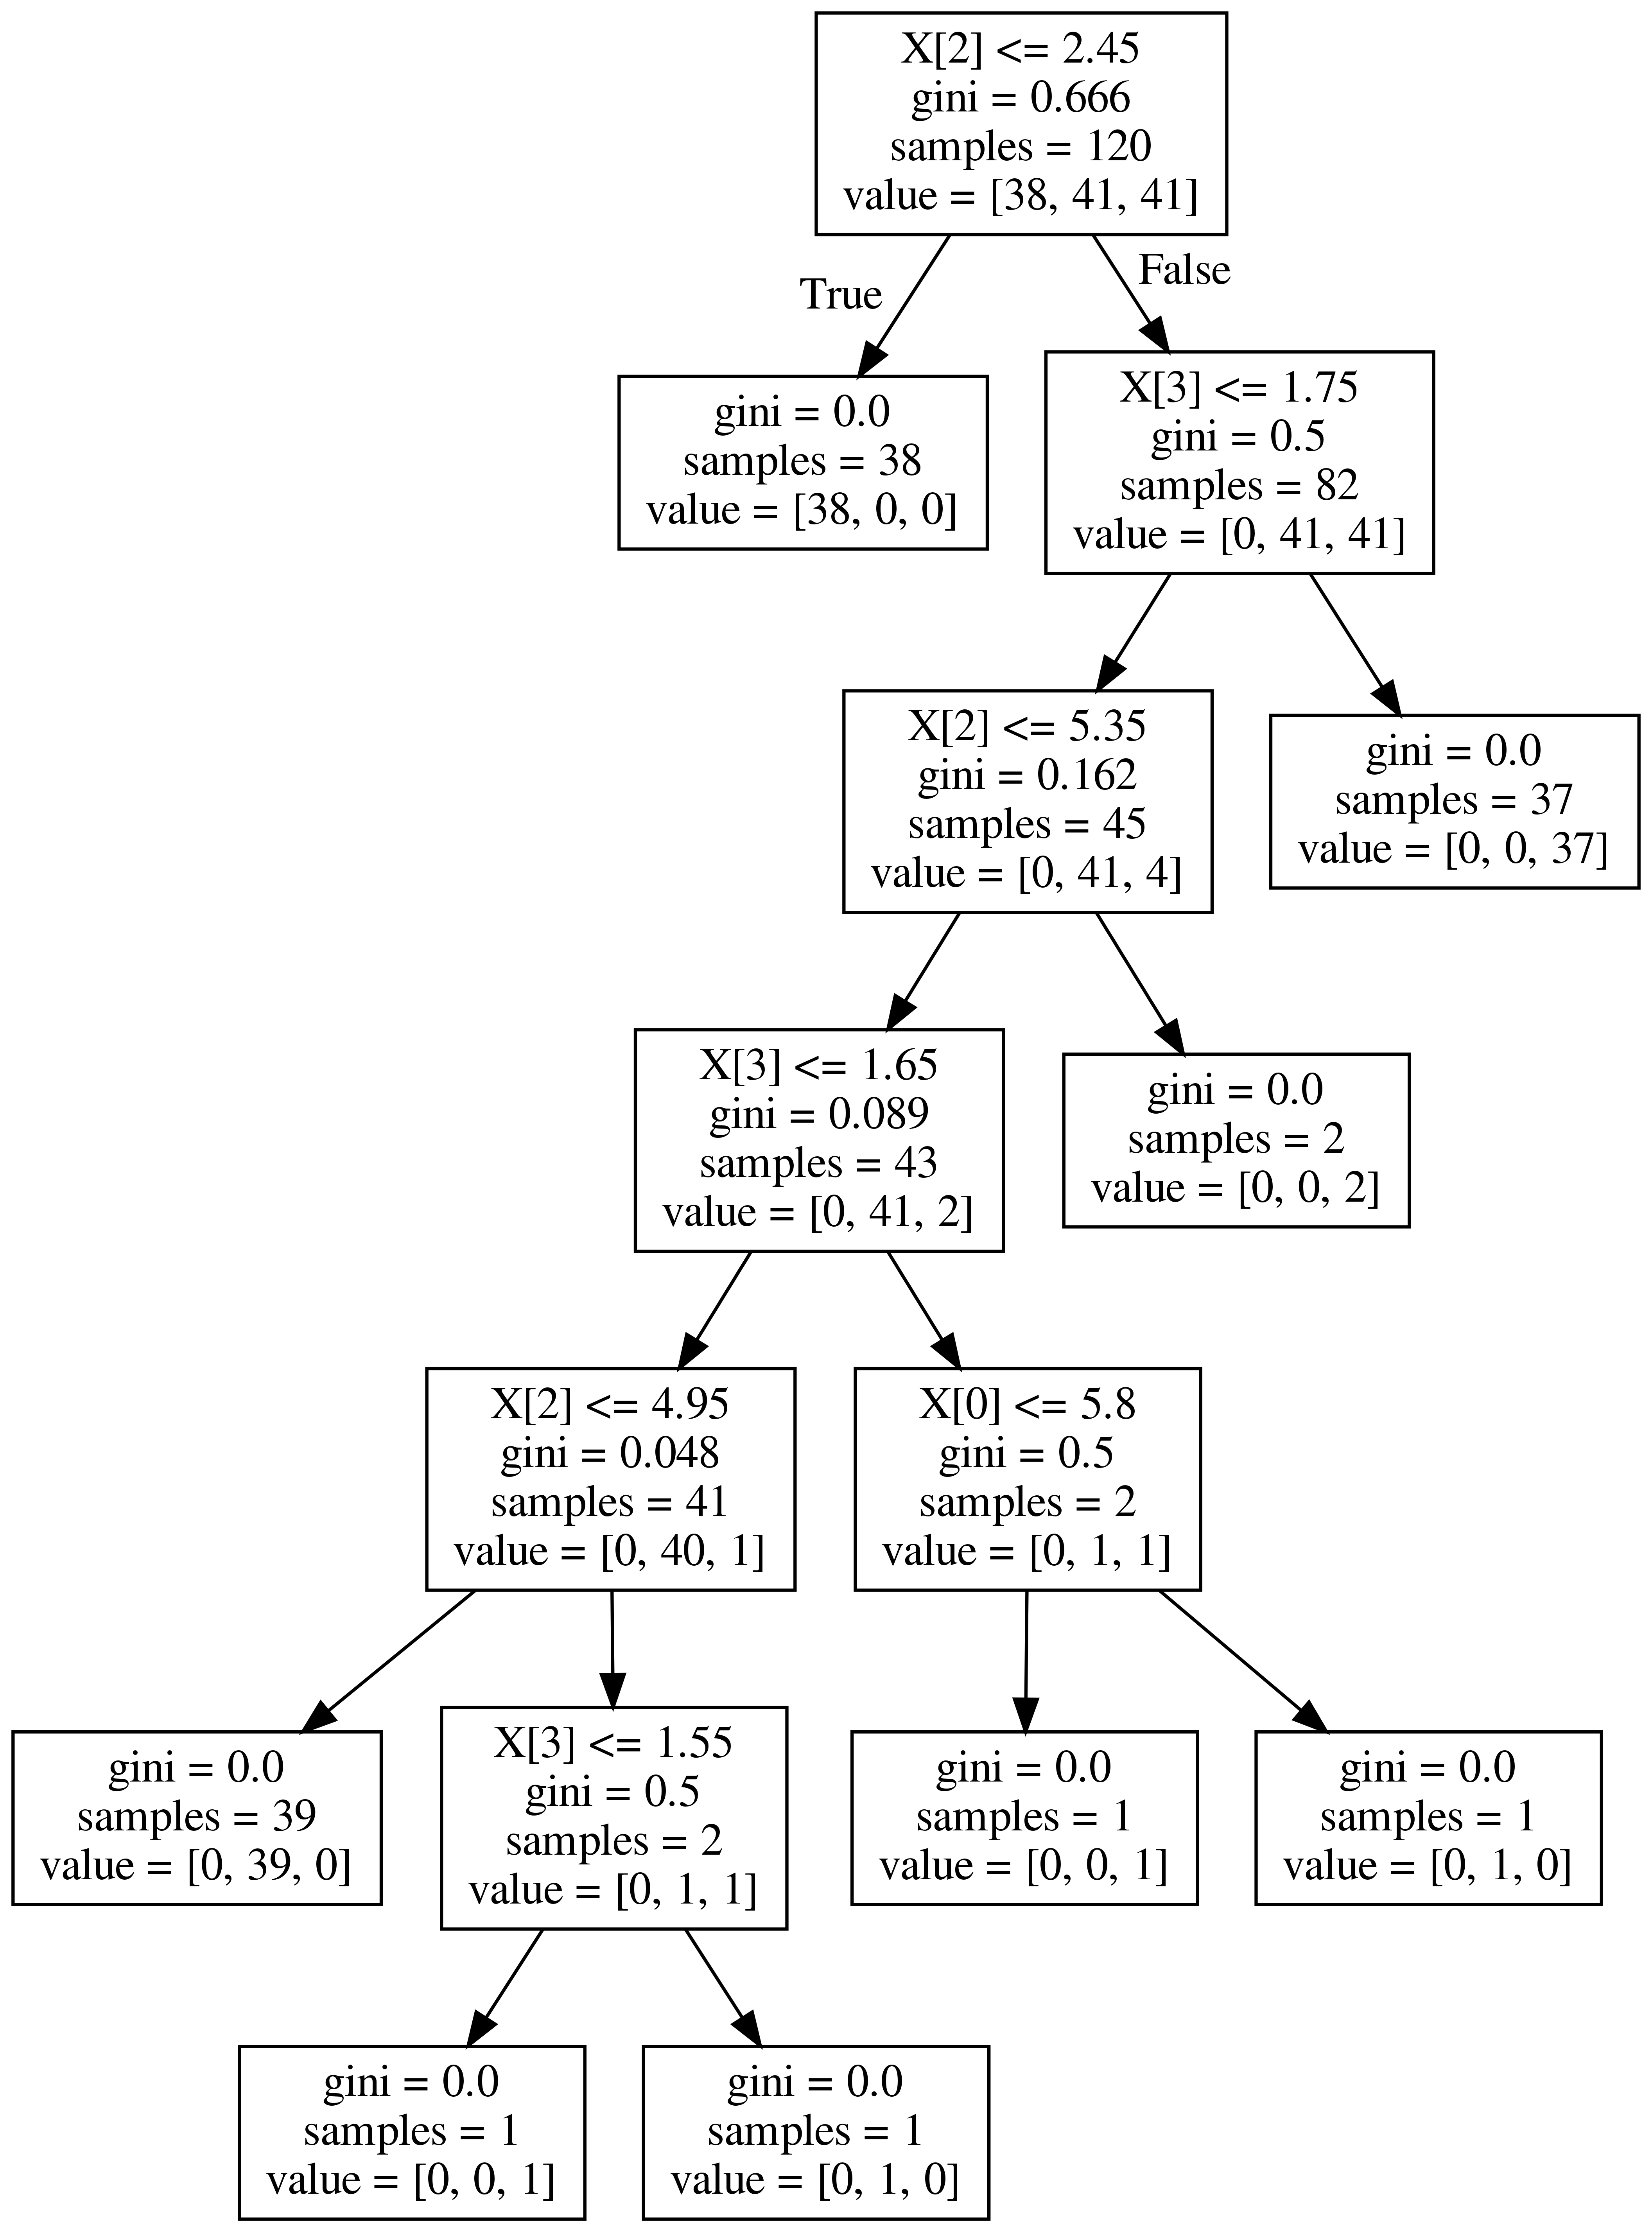

In [36]:
Image('https://teddylee777.github.io/images/2020-01-09/decistion-tree.png', width=600)

Be sure to **fix** the `random_state` value when tuning

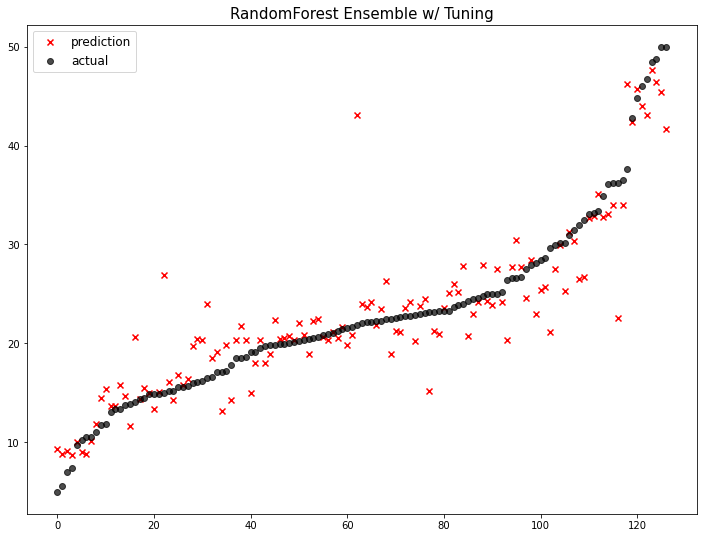

                             model        mse
0         ElasticNet(l1_ratio=0.8)  23.074116
1                 LinearRegression  22.641613
2                Lasso(alpha=0.01)  22.279112
3              Standard ElasticNet  22.058335
4                   Ridge(alpha=1)  21.869433
5                  Voting Ensemble  20.521588
6                  Poly ElasticNet  17.086267
7            RandomForest Ensemble  14.309778
8  RandomForest Ensemble w/ Tuning  14.070580


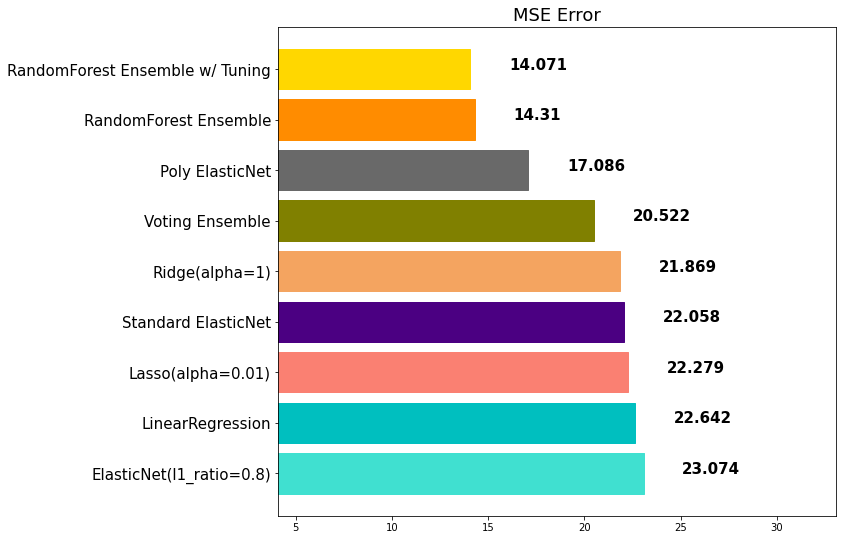

In [38]:
rfr = RandomForestRegressor(random_state = 42, n_estimators = 1000, max_depth = 7, max_features = 0.8)
rfr.fit(x_train, y_train)
rfr_pred = rfr.predict(x_test)
mse_eval('RandomForest Ensemble w/ Tuning', rfr_pred, y_test)